In [1]:
pip install wfdb

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 159 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 672 kB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 602 kB/s eta 0:00:01
     |████████████████████████████████| 5.2 MB 626 kB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 690 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 680 kB/s eta 0:00:01
     |████████████████████████████████| 66 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 566 kB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 1.1 MB/s eta 0:00:01
     |███████████████████████████████

In [3]:
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import stft
import numpy as np
import wfdb


 Numero de canales : 4 
Frecuencia de muestreo 5000
Duracion de la grabacion: 272.01


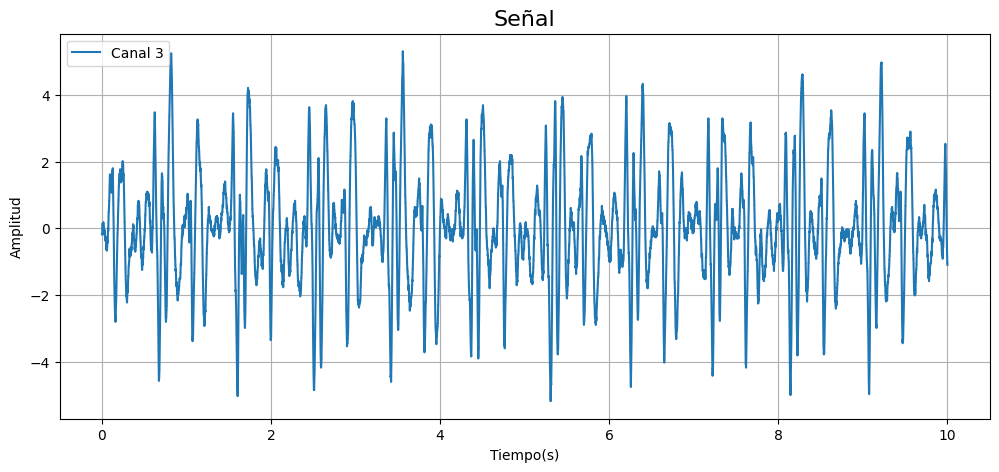

In [16]:
record_name = 'b001'
record = wfdb.rdrecord(record_name)
print(f' Numero de canales : {record.n_sig} ')
print(f'Frecuencia de muestreo {record.fs}')
print(f'Duracion de la grabacion: {record.sig_len / record.fs}' )

signal  = record.p_signal
canal = 4

senial = signal[:50000, canal - 1]
tiempo = [i / record.fs for i in range(len(senial))]
plt.figure(figsize=(12,5))
plt.plot(tiempo,senial,label = f'Canal {canal - 1}')
plt.title('Señal', fontsize = 16)
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

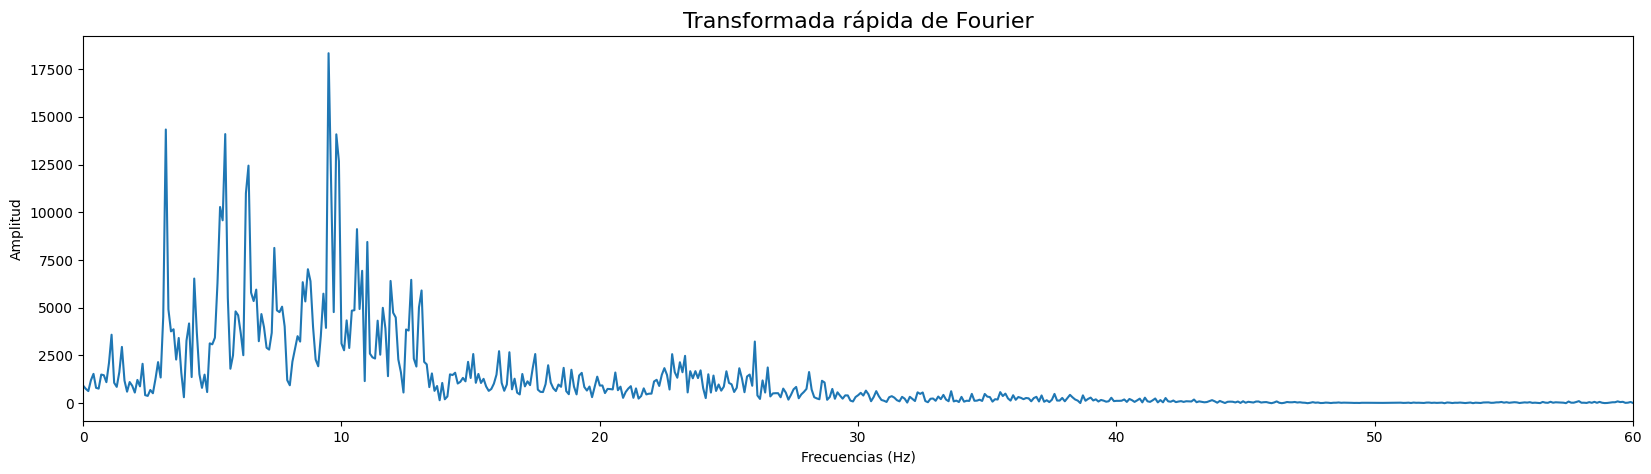

In [36]:
sample_freq = record.fs

yf = rfft(senial)

xf = rfftfreq(len(senial), 1/sample_freq)

ampl = np. abs (yf)

plt. figure(figsize=(20,5))

plt. plot(xf, ampl)

plt.xlim (0,60)

plt.xlabel( 'Frecuencias (Hz)')

plt.ylabel ('Amplitud')


plt. title('Transformada rápida de Fourier', fontsize = 16)
plt. show()


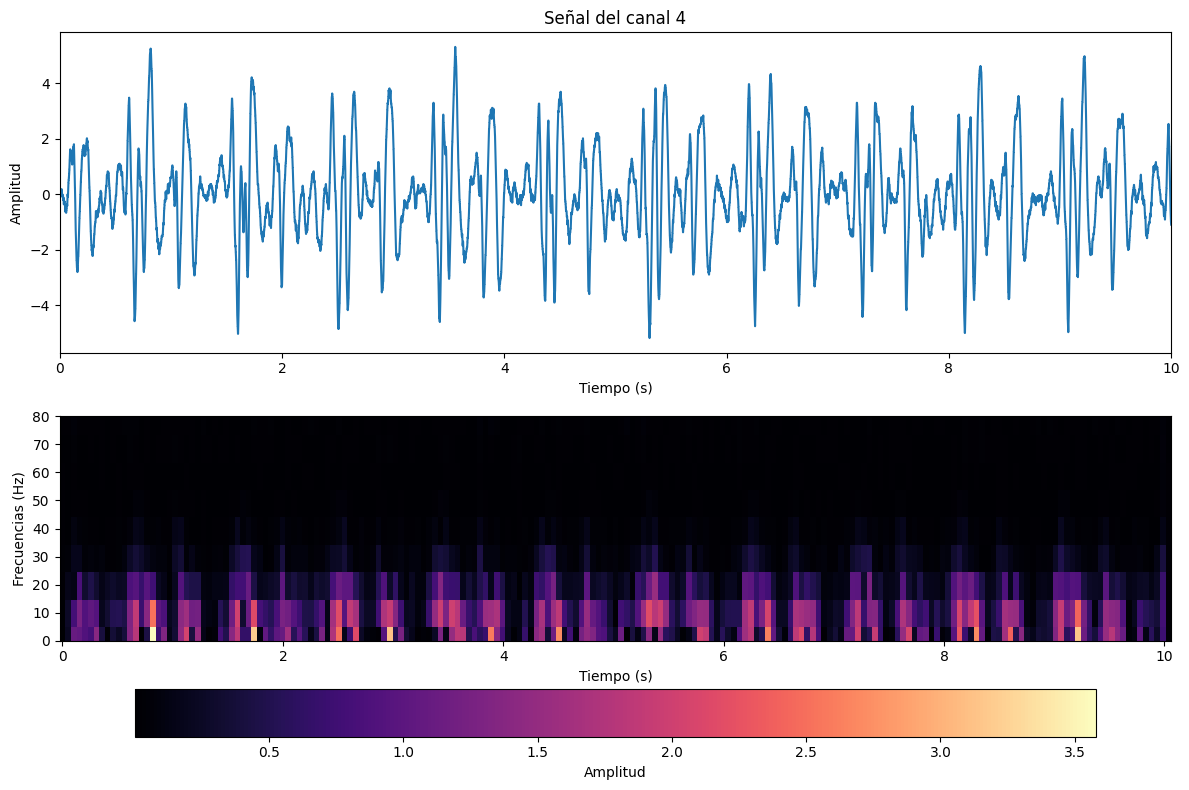

In [40]:
sample_freq = record.fs
f, t_stft, zxx = stft(senial, sample_freq , nperseg = 2**9)
plt. figure (figsize = (12,8))
plt. subplot (2,1,1)
plt. plot(tiempo, senial)
plt. title(f'Señal del canal {canal}')
plt.xlabel( 'Tiempo (s)')
plt.ylabel( 'Amplitud')
plt.xlim (0,10)
plt.subplot (2,1,2)

plt.pcolormesh(t_stft, f, np.abs(zxx), cmap = "magma")
plt.colorbar(label = 'Amplitud', orientation = 'horizontal')
plt.xlabel( 'Tiempo (s)')
plt.ylabel( 'Frecuencias (Hz)')
plt.ylim (0,80)
plt. tight_layout()
plt. show()

In [41]:
pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.3 MB 1.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
